In [20]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# 画像の読み込み
im = cv2.imread('IMG_2BCE1EB797B2-1.JPG')
image=cv2.imread('IMG_2BCE1EB797B2-1.JPG')

In [3]:
# グレイスケールに変換しぼかした上で二値化する 
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2)

In [4]:
# 輪郭を抽出 --- (※1)
contours = cv2.findContours(
    thresh,      
    cv2.RETR_EXTERNAL, 
    cv2.CHAIN_APPROX_SIMPLE)[0]

In [29]:
# 抽出した領域を繰り返し処理する 
bound_rects=[cv2.boundingRect(c) for c in contours]
#bound_rectsは(x,y,w,h)のリスト

In [30]:
df_bound_rects=pd.DataFrame(bound_rects)
df_bound_rects.columns = ['x', 'y', 'w','h']

In [31]:
df_bound_rects

,x,y,w,h
0,214,1381,10,16
1,560,1371,7,10
2,527,1370,11,9
3,214,1370,9,8
4,529,1369,28,27
...,...,...,...,...
323,503,45,77,95
324,411,40,84,101
325,313,40,91,100
326,239,39,67,102


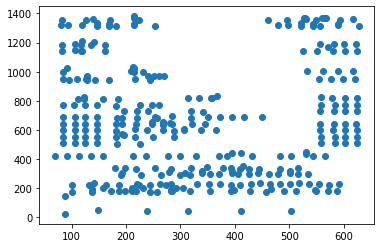

In [6]:
plt.scatter(x,y)
plt.show()